In [1]:
import pandas as pd
# 读取数据
file_path = '../new_NBA_pt2/0429_nba_players_2023_24_with_final_pos.csv'
df = pd.read_csv(file_path)

In [2]:
# 查看数据集信息
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  572 non-null    int64  
 1   PName       572 non-null    object 
 2   POS         572 non-null    object 
 3   Team        572 non-null    object 
 4   Age         572 non-null    int64  
 5   GP          572 non-null    int64  
 6   W           572 non-null    int64  
 7   L           572 non-null    int64  
 8   Min         572 non-null    float64
 9   PTS         572 non-null    int64  
 10  FGM         572 non-null    int64  
 11  FGA         572 non-null    int64  
 12  FG%         572 non-null    float64
 13  3PM         572 non-null    int64  
 14  3PA         572 non-null    int64  
 15  3P%         572 non-null    float64
 16  FTM         572 non-null    int64  
 17  FTA         572 non-null    int64  
 18  FT%         572 non-null    float64
 19  OREB        572 non-null    i

In [3]:
# 先改列名
df = df.rename(columns={"Player": "PName", "Pos": "POS"})

# 然后重新排列列顺序
columns = list(df.columns)
# 把 PName, POS, Team 放到前面
new_columns_order = ['PName', 'POS', 'Team'] + [col for col in columns if col not in ['PName', 'POS', 'Team']]
df = df[new_columns_order]
df.to_csv('../new_NBA_pt2/0429_nba_players_2023_24_with_final_pos.csv')

In [4]:
# 显示数据的前几行
print(df.head())

                     PName POS Team  Unnamed: 0  Age  GP   W   L     Min  \
0              Luka Dončić  PG  DAL           0   25  70  46  24  2624.0   
1  Shai Gilgeous-Alexander  PG  OKC           1   25  75  55  20  2552.7   
2    Giannis Antetokounmpo  PF  MIL           2   29  73  45  28  2567.2   
3            Jalen Brunson  PG  NYK           3   27  77  49  28  2726.3   
4             Nikola Jokić   C  DEN           4   29  79  55  24  2736.5   

    PTS  ...  REB  AST  TOV  STL  BLK   PF    FP  DD2  TD3  +/-  
0  2370  ...  647  686  282   99   38  149  4304   49   21  319  
1  2254  ...  415  465  162  150   67  184  3939    8    0  613  
2  2222  ...  841  476  250   87   79  210  4193   57   10  339  
3  2212  ...  278  519  186   70   13  144  3387    9    0  512  
4  2085  ...  976  708  237  108   68  194  4609   68   25  682  

[5 rows x 31 columns]


In [5]:
# 1. 去除空值
df.dropna(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PName       572 non-null    object 
 1   POS         572 non-null    object 
 2   Team        572 non-null    object 
 3   Unnamed: 0  572 non-null    int64  
 4   Age         572 non-null    int64  
 5   GP          572 non-null    int64  
 6   W           572 non-null    int64  
 7   L           572 non-null    int64  
 8   Min         572 non-null    float64
 9   PTS         572 non-null    int64  
 10  FGM         572 non-null    int64  
 11  FGA         572 non-null    int64  
 12  FG%         572 non-null    float64
 13  3PM         572 non-null    int64  
 14  3PA         572 non-null    int64  
 15  3P%         572 non-null    float64
 16  FTM         572 non-null    int64  
 17  FTA         572 non-null    int64  
 18  FT%         572 non-null    float64
 19  OREB        572 non-null    i

In [6]:
# 2. 去除重复值
df.drop_duplicates(inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 571
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PName       572 non-null    object 
 1   POS         572 non-null    object 
 2   Team        572 non-null    object 
 3   Unnamed: 0  572 non-null    int64  
 4   Age         572 non-null    int64  
 5   GP          572 non-null    int64  
 6   W           572 non-null    int64  
 7   L           572 non-null    int64  
 8   Min         572 non-null    float64
 9   PTS         572 non-null    int64  
 10  FGM         572 non-null    int64  
 11  FGA         572 non-null    int64  
 12  FG%         572 non-null    float64
 13  3PM         572 non-null    int64  
 14  3PA         572 non-null    int64  
 15  3P%         572 non-null    float64
 16  FTM         572 non-null    int64  
 17  FTA         572 non-null    int64  
 18  FT%         572 non-null    float64
 19  OREB        572 non-null    i

In [7]:
# 3. 处理异常值
# 例如：得分（PTS）、篮板（REB）、助攻（AST）不能为负数
numeric_columns = ['GP', 'Min', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3']
for col in numeric_columns:
    df = df[df[col] >= 0]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 571
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PName       572 non-null    object 
 1   POS         572 non-null    object 
 2   Team        572 non-null    object 
 3   Unnamed: 0  572 non-null    int64  
 4   Age         572 non-null    int64  
 5   GP          572 non-null    int64  
 6   W           572 non-null    int64  
 7   L           572 non-null    int64  
 8   Min         572 non-null    float64
 9   PTS         572 non-null    int64  
 10  FGM         572 non-null    int64  
 11  FGA         572 non-null    int64  
 12  FG%         572 non-null    float64
 13  3PM         572 non-null    int64  
 14  3PA         572 non-null    int64  
 15  3P%         572 non-null    float64
 16  FTM         572 non-null    int64  
 17  FTA         572 non-null    int64  
 18  FT%         572 non-null    float64
 19  OREB        572 non-null    i

In [8]:
# 4. 标准化字段名称
df.columns = [col.lower() for col in df.columns]

In [9]:
# 查看每个位置的球员数量
pos_counts = df['pos'].value_counts()
print(pos_counts)

SG       119
SF       118
PG       116
PF       112
C         95
PG-SG      4
SF-PF      2
C-PF       2
SF-SG      1
PF-C       1
PF-SF      1
SG-PG      1
Name: pos, dtype: int64


In [10]:
# 6. 添加新特征
# 添加一个新特征列，例如每分钟得分（PTS per minute）
df['pts_per_minute'] = df['pts'] / df['min']

In [11]:
# 保存清洗后的数据
cleaned_file_path = '../NBA_data_2024/cleaned_data.csv'
df.to_csv(cleaned_file_path, index=False)

print(f"清洗后的数据已保存到 {cleaned_file_path}")

清洗后的数据已保存到 ../NBA_data_2024/cleaned_data.csv


In [12]:
!pip install pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, sum, count, when
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

Defaulting to user installation because normal site-packages is not writeable


In [13]:
import os

os.environ["SPARK_LOCAL_HOSTNAME"] = "127.0.0.1"
os.environ["SPARK_DRIVER_HOST"] = "127.0.0.1"

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("NBAPlayerStatsAnalysis") \
    .master("local[*]") \
    .config("spark.driver.bindAddress", "127.0.0.1") \
    .config("spark.driver.host", "127.0.0.1") \
    .getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/05/02 16:04:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.
25/05/02 16:04:20 WARN Utils: Service 'SparkUI' could not bind on port 4046. Attempting port 4047.
25/05/02 16:04:20 WARN Utils: Serv

In [14]:
# 从 HDFS 读取数据
df = spark.read.option("header", True).option("inferSchema", True).csv("../NBA_data_2024/cleaned_data.csv")

In [15]:
# 计算每个球员的场均得分、篮板和助攻
df = df.withColumn('avg_points', col('pts') / col('gp')) \
       .withColumn('avg_rebounds', col('reb') / col('gp')) \
       .withColumn('avg_assists', col('ast') / col('gp')) \
       .withColumn('avg_fg%', col('fg%') / 100) \
       .withColumn('avg_3p%', col('3p%') / 100) \
       .withColumn('win_rate', col('w') / col('gp')) \
       .withColumn('lose_rate', col('l') / col('gp'))
# 将数据保存到本地文件
df.toPandas().to_csv('processed_data.csv')

25/05/02 16:04:27 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [16]:
# 1. 每个球队的场均得分、篮板和助攻
team_stats = df.groupBy('team').agg(
    (sum('pts')/82).alias('team_avg_points'),
    (sum('reb')/82).alias('team_avg_rebounds'),
    (sum('ast')/82).alias('team_avg_assists'),
    avg('avg_fg%').alias('team_avg_fg%'),
    avg('avg_3p%').alias('team_avg_3p%'),
    avg('win_rate').alias('team_win_rate'),
    avg('lose_rate').alias('team_lose_rate')
).orderBy(col('team_avg_points').desc()).limit(10)
team_stats.toPandas().to_csv("team_stats.csv", header=True)
team_stats.show()

+----+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+
|team|   team_avg_points| team_avg_rebounds|  team_avg_assists|       team_avg_fg%|       team_avg_3p%|      team_win_rate|     team_lose_rate|
+----+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+
| LAL|127.48780487804878| 45.74390243902439| 32.96341463414634| 0.4420526315789473|  0.264421052631579| 0.5238149382913109| 0.4761850617086891|
| OKC| 125.6219512195122| 46.23170731707317| 28.20731707317073|0.45722222222222225|0.34688888888888886| 0.6636102598521826| 0.3363897401478175|
| DAL|123.70731707317073|46.548780487804876|26.170731707317074| 0.4856315789473684| 0.2890526315789474|  0.547126908586399|  0.452873091413601|
| IND|123.58536585365853|40.792682926829265|30.634146341463413| 0.4591111111111111|0.25433333333333336| 0.5847741202213554|0.41522587977

In [17]:
# 2. 计算每个位置的场均得分、篮板和助攻，并包含命中率和三分命中率
pos_stats = df.groupBy('pos').agg(
    avg('avg_points').alias('pos_avg_points'),
    avg('avg_rebounds').alias('pos_avg_rebounds'),
    avg('avg_assists').alias('pos_avg_assists'),
    avg('avg_fg%').alias('pos_avg_fg%'),
    avg('avg_3p%').alias('pos_avg_3p%')
)
pos_stats.toPandas().to_csv("pos_stats.csv", header=True)
pos_stats.show()

+-----+------------------+------------------+------------------+-------------------+-------------------+
|  pos|    pos_avg_points|  pos_avg_rebounds|   pos_avg_assists|        pos_avg_fg%|        pos_avg_3p%|
+-----+------------------+------------------+------------------+-------------------+-------------------+
|SF-PF| 9.559360730593607| 6.481735159817352|1.6232876712328768|             0.5795|             0.2145|
|   PF| 8.707892552823571|3.4126207966448554| 2.046644014047799| 0.4378928571428572|0.27727678571428566|
|SF-SG|12.573333333333334|3.0533333333333332|2.7333333333333334|0.47100000000000003|              0.397|
| PF-C|7.0606060606060606|3.6363636363636362|1.9393939393939394|0.46299999999999997|              0.387|
|   PG| 8.881077046308919|3.3622945763600276|  2.21585980977508| 0.4489655172413794|0.29493103448275865|
|SG-PG|2.7333333333333334|0.9333333333333333|0.6666666666666666|              0.306|              0.303|
| C-PF|  6.77658371040724|1.6470588235294117|1.32975113

In [18]:
# 3. 计算每个年龄段的场均得分、篮板和助攻，并包含命中率和三分命中率
age_stats = df.groupBy('age').agg(
    avg('avg_points').alias('age_avg_points'),
    avg('avg_rebounds').alias('age_avg_rebounds'),
    avg('avg_assists').alias('age_avg_assists'),
    avg('avg_fg%').alias('age_avg_fg%'),
    avg('avg_3p%').alias('age_avg_3p%')
)
age_stats.toPandas().to_csv("age_stats.csv", header=True)
age_stats.show()

+---+------------------+------------------+------------------+-------------------+-------------------+
|age|    age_avg_points|  age_avg_rebounds|   age_avg_assists|        age_avg_fg%|        age_avg_3p%|
+---+------------------+------------------+------------------+-------------------+-------------------+
| 31| 8.555490382819865|3.4698635265770013|1.9517317937067298|0.46223076923076917|0.31003846153846154|
| 34| 13.09395693758154| 4.222818054807016|3.7426776025954873| 0.4606666666666667|0.35683333333333334|
| 28|  10.2748134326813| 4.315051132093324|2.4799479216428555|0.48329411764705876|0.37552941176470583|
| 27| 8.896963065339534|3.0726261074563315|1.9546871599937872|0.45713636363636356| 0.3151818181818182|
| 26| 8.503778365569541|3.7337173023761134|1.8632606055363634| 0.4657636363636364| 0.2796363636363636|
| 22| 9.045628505686382|3.4531232857250727|1.8964515856105817|0.44012499999999993|           0.272925|
| 20| 6.246586921518786| 2.924112255206471|1.4591215366080534|0.436826086

In [19]:
# 4. 找出每个球队场均得分最高的球员
windowSpec = Window.partitionBy('team').orderBy(col('avg_points').desc())
team_top_scorers = df.withColumn('rank', row_number().over(windowSpec)).filter(col('rank') == 1).select('team', 'pname', 'avg_points')
team_top_scorers.toPandas().to_csv("team_top_scorers.csv", header=True)
team_top_scorers.show()

+----+--------------------+------------------+
|team|               pname|        avg_points|
+----+--------------------+------------------+
| ATL|          Trae Young| 25.72222222222222|
| BKN|          Cam Thomas|22.454545454545453|
| BOS|        Jayson Tatum| 26.85135135135135|
| CHA|         LaMelo Ball| 23.90909090909091|
| CHI|       DeMar DeRozan|  24.0126582278481|
| CLE|    Donovan Mitchell|              26.6|
| DAL|         Luka Dončić|33.857142857142854|
| DEN|        Nikola Jokić| 26.39240506329114|
| DET|     Cade Cunningham|22.661290322580644|
| GSW|       Stephen Curry| 26.43243243243243|
| HOU|      Alperen Sengun|21.126984126984127|
| IND|       Pascal Siakam|           21.7125|
| LAC|       Kawhi Leonard|23.720588235294116|
| LAL|        LeBron James|25.661971830985916|
| MEM|           Ja Morant| 25.11111111111111|
| MIA|         Tyler Herro|20.833333333333332|
| MIL|Giannis Antetokou...|30.438356164383563|
| MIN|     Anthony Edwards|25.936708860759495|
| NOP|     Zi

In [20]:
# 5. 找出每个位置场均得分最高的球员
windowSpec = Window.partitionBy('pos').orderBy(col('avg_points').desc())
pos_top_scorers = df.withColumn('rank', row_number().over(windowSpec)).filter(col('rank') == 1).select('pos', 'pname', 'avg_points')
pos_top_scorers.toPandas().to_csv("pos_top_scorers.csv", header=True)
pos_top_scorers.show()

+-----+--------------------+------------------+
|  pos|               pname|        avg_points|
+-----+--------------------+------------------+
|    C|    Donovan Mitchell|              26.6|
| C-PF|         Eric Gordon|11.014705882352942|
|   PF|Giannis Antetokou...|30.438356164383563|
| PF-C|       Naji Marshall|7.0606060606060606|
|PF-SF|           Matt Ryan| 5.428571428571429|
|   PG|         Luka Dončić|33.857142857142854|
|PG-SG|        James Harden|16.555555555555557|
|   SF|         Joel Embiid| 34.69230769230769|
|SF-PF|        Clint Capela|11.452054794520548|
|SF-SG|         Jalen Suggs|12.573333333333334|
|   SG|     Anthony Edwards|25.936708860759495|
|SG-PG|         Emoni Bates|2.7333333333333334|
+-----+--------------------+------------------+



In [21]:
# 6. 找出每个年龄段场均得分最高的球员
windowSpec = Window.partitionBy('age').orderBy(col('avg_points').desc())
age_top_scorers = df.withColumn('rank', row_number().over(windowSpec)).filter(col('rank') == 1).select('age', 'pname', 'avg_points')
age_top_scorers.toPandas().to_csv("age_top_scorers.csv", header=True)
age_top_scorers.show()


+---+--------------------+------------------+
|age|               pname|        avg_points|
+---+--------------------+------------------+
| 19|          GG Jackson|           14.5625|
| 20|   Victor Wembanyama| 21.43661971830986|
| 21|      Paolo Banchero|             22.55|
| 22|     Anthony Edwards|25.936708860759495|
| 23|        Tyrese Maxey|25.942857142857143|
| 24|           Ja Morant| 25.11111111111111|
| 25|         Luka Dončić|33.857142857142854|
| 26|        Jayson Tatum| 26.85135135135135|
| 27|       Jalen Brunson|28.727272727272727|
| 28|          Kyle Kuzma|22.185714285714287|
| 29|Giannis Antetokou...|30.438356164383563|
| 30|         Joel Embiid| 34.69230769230769|
| 31|       Anthony Davis| 24.68421052631579|
| 32|        Kyrie Irving|25.637931034482758|
| 33|      Damian Lillard|24.315068493150687|
| 34|       DeMar DeRozan|  24.0126582278481|
| 35|        Kevin Durant|27.093333333333334|
| 36|       Stephen Curry| 26.43243243243243|
| 37|          Jeff Green|6.525641

In [22]:
# 7. 找出场均得分最高的前 10 名球员
top_10_scorers = df.orderBy(col('avg_points').desc()).limit(10).select('pname', 'avg_points', 'team', 'pos', 'age', 'avg_rebounds', 'avg_assists', 'avg_fg%', 'avg_3p%')
top_10_scorers.toPandas().to_csv("top_10_scorers.csv", header=True)
top_10_scorers.show()


+--------------------+------------------+----+---+---+------------------+------------------+-------------------+-------------------+
|               pname|        avg_points|team|pos|age|      avg_rebounds|       avg_assists|            avg_fg%|            avg_3p%|
+--------------------+------------------+----+---+---+------------------+------------------+-------------------+-------------------+
|         Joel Embiid| 34.69230769230769| PHI| SF| 30|11.025641025641026| 5.615384615384615|              0.529|0.38799999999999996|
|         Luka Dončić|33.857142857142854| DAL| PG| 25| 9.242857142857142|               9.8|0.48700000000000004|              0.382|
|Giannis Antetokou...|30.438356164383563| MIL| PF| 29|11.520547945205479|  6.52054794520548|              0.611|0.27399999999999997|
|Shai Gilgeous-Ale...|30.053333333333335| OKC| PG| 25| 5.533333333333333|               6.2|              0.535|              0.353|
|       Jalen Brunson|28.727272727272727| NYK| PG| 27|3.6103896103896

In [23]:
# 8. 计算每个球员的场均篮板数
# 计算每个球员的场均篮板数
df = df.withColumn('avg_rebounds', col('reb') / col('gp'))
# 对球员的场均篮板数进行排序
player_avg_rebounds = df.orderBy(col('avg_rebounds').desc()).select('pname', 'avg_rebounds')
player_avg_rebounds.toPandas().to_csv("player_avg_rebounds.csv", header=True)
player_avg_rebounds.show()

+--------------------+------------------+
|               pname|      avg_rebounds|
+--------------------+------------------+
|    Domantas Sabonis|13.658536585365853|
|         Rudy Gobert|12.921052631578947|
|       Anthony Davis|12.644736842105264|
|        Nikola Jokić|12.354430379746836|
|         Jalen Duren| 11.62295081967213|
|Giannis Antetokou...|11.520547945205479|
|       Deandre Ayton|11.072727272727272|
|         Joel Embiid|11.025641025641026|
|        Jusuf Nurkić|11.013157894736842|
|   Victor Wembanyama|10.633802816901408|
|        Clint Capela| 10.63013698630137|
|      Nikola Vučević|10.539473684210526|
|       Jarrett Allen|10.532467532467532|
|         Bam Adebayo|10.380281690140846|
|         Nic Claxton| 9.943661971830986|
|       Mark Williams|  9.68421052631579|
|         Evan Mobley|              9.36|
|      Alperen Sengun|  9.34920634920635|
|         Luka Dončić| 9.242857142857142|
|         Ivica Zubac| 9.205882352941176|
+--------------------+------------

In [24]:
# 9. 计算每个球员的场均助攻数
player_avg_assists = df.withColumn('avg_assists', col('ast') / col('gp'))
player_avg_assists = df.orderBy(col('avg_assists').desc()).select('pname', 'avg_assists')
player_avg_assists.show()
player_avg_assists.toPandas().to_csv("player_avg_assists.csv", header=True)


+--------------------+------------------+
|               pname|       avg_assists|
+--------------------+------------------+
|   Tyrese Haliburton|10.898550724637682|
|          Trae Young|10.796296296296296|
|         Luka Dončić|               9.8|
|        Nikola Jokić| 8.962025316455696|
|        James Harden| 8.527777777777779|
|        LeBron James| 8.295774647887324|
|    Domantas Sabonis| 8.207317073170731|
|           Ja Morant|  8.11111111111111|
|       Fred VanVleet| 8.068493150684931|
|         LaMelo Ball|               8.0|
|     Cade Cunningham| 7.483870967741935|
|          Tyus Jones| 7.348484848484849|
|      Damian Lillard| 6.958904109589041|
|        Devin Booker|6.9411764705882355|
|          Chris Paul| 6.775862068965517|
|       Jalen Brunson| 6.740259740259741|
|      Darius Garland| 6.543859649122807|
|Giannis Antetokou...|  6.52054794520548|
|        Jamal Murray| 6.508474576271187|
|     Dejounte Murray| 6.435897435897436|
+--------------------+------------

In [25]:
# 10. 计算每个球员的得分与时间的比率（得分/分钟）
player_pts_per_min = df.withColumn('pts_per_minute', col('pts') / col('min'))
player_pts_per_min = df.orderBy(col('pts_per_minute').desc()).select('pname', 'pts_per_minute')
player_pts_per_min.show()
player_pts_per_min.toPandas().to_csv("player_pts_per_min.csv", header=True)


+--------------------+------------------+
|               pname|    pts_per_minute|
+--------------------+------------------+
|  Izaiah Brockington|1.1764705882352942|
|         Joel Embiid|1.0332976936001221|
|         Luka Dončić|0.9032012195121951|
|Shai Gilgeous-Ale...|0.8829866415951738|
|Giannis Antetokou...| 0.865534434403241|
|          Luka Garza| 0.812807881773399|
|       Jalen Brunson|0.8113560503246158|
|       Stephen Curry|0.8077637827792691|
|   Lindell Wigginton|0.7894736842105263|
|        Nikola Jokić|0.7619221633473415|
|    Donovan Mitchell|0.7530756164101507|
|        Devin Booker|0.7524420648220052|
|        Jayson Tatum|0.7511719340692575|
|     Anthony Edwards|0.7396043892578689|
|        De'Aaron Fox|0.7394313224010831|
|         LaMelo Ball|0.7393871239808828|
|       Dexter Dennis|0.7357859531772576|
|        Kyrie Irving|0.7326566811194324|
|        Kevin Durant|0.7281588188919946|
|        LeBron James|0.7277229700043936|
+--------------------+------------

In [26]:
# 11. 分析球员的命中率和三分命中率
player_fg_3p_stats = df.select('pname', 'avg_fg%', 'avg_3p%').orderBy(col('avg_fg%').desc())
player_fg_3p_stats.toPandas().to_csv("player_fg_3p_stats.csv", header=True)
player_fg_3p_stats.show()

+--------------------+------------------+-------------------+
|               pname|           avg_fg%|            avg_3p%|
+--------------------+------------------+-------------------+
|    Dereck Lively II|             0.747|                0.0|
|      Daniel Gafford|             0.725|                0.0|
|      Charles Bassey|             0.725|                0.0|
|        Jaxson Hayes|              0.72|                0.0|
|Trayce Jackson-Davis|0.7020000000000001|                0.0|
|         Luke Kornet|               0.7|                1.0|
|      Udoka Azubuike|             0.696|                0.0|
|       Nick Richards|             0.691|                0.0|
|        Jericho Sims|             0.691|                0.0|
|      Marques Bolden|              0.68|                0.0|
|       Dwight Powell|             0.679|0.33299999999999996|
|      Mamadi Diakite|             0.667|                0.0|
|       Drew Peterson|             0.667|                0.6|
|       

In [27]:
# 12. 分析每个球队的胜率和输率
team_win_lose_rate = df.groupBy('team').agg(
    avg('win_rate').alias('team_win_rate'),
    avg('lose_rate').alias('team_lose_rate')
).orderBy(col('team_win_rate').desc())
team_win_lose_rate.toPandas().to_csv("team_win_lose_rate.csv", header=True)
team_win_lose_rate.show()

+----+-------------------+-------------------+
|team|      team_win_rate|     team_lose_rate|
+----+-------------------+-------------------+
| BOS| 0.8014458249661326| 0.1985541750338675|
| MIN| 0.7063159436133456| 0.2936840563866544|
| DEN| 0.7041133054621725|0.29588669453782745|
| OKC| 0.6636102598521826| 0.3363897401478175|
| LAC|  0.625517227341279|  0.374482772658721|
| GSW| 0.6026845092224369| 0.3973154907775633|
| PHI| 0.6023400624214573|0.39765993757854273|
| NOP| 0.5880225479857565| 0.4119774520142436|
| IND| 0.5847741202213554|0.41522587977864445|
| MIL| 0.5702327760787366| 0.4297672239212635|
| SAC| 0.5674062209775457|0.43259377902245433|
| ORL| 0.5594315566722761|0.44056844332772394|
| CLE| 0.5499616865129233|0.45003831348707657|
| PHX| 0.5485055457069968| 0.4514944542930033|
| DAL|  0.547126908586399|  0.452873091413601|
| MIA| 0.5378858656908736|0.46211413430912635|
| NYK| 0.5350700163768302| 0.4649299836231699|
| LAL| 0.5238149382913109| 0.4761850617086891|
| HOU| 0.5125

25/05/02 16:04:36 WARN Instrumentation: [a2996140] regParam is zero, which might cause numerical instability and overfitting.
25/05/02 16:04:37 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
25/05/02 16:04:37 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK
25/05/02 16:04:37 WARN Instrumentation: [123317ea] regParam is zero, which might cause numerical instability and overfitting.


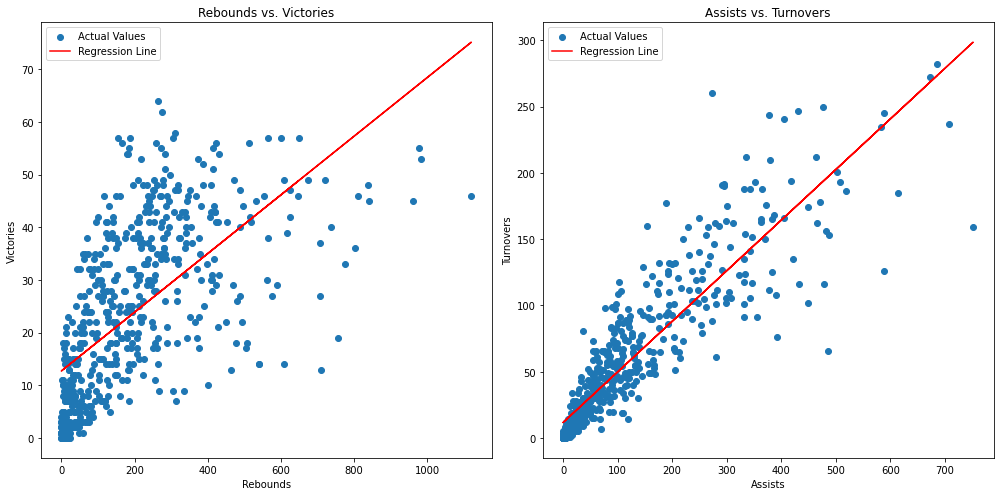

Rebounds vs. Victories - R2: 0.4037890822317338, RMSE: 12.571516588676197
Assists vs. Turnovers - R2: 0.8005992249116459, RMSE: 25.539321508333877


In [28]:
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Load the data
data_path = "../NBA_data_2024/cleaned_data.csv"
data = spark.read.csv(data_path, header=True, inferSchema=True)

# Prepare data for analysis of rebounds vs. victories
vector_assembler_rebounds = VectorAssembler(inputCols=["reb"], outputCol="features_rebounds")
data_rebounds = vector_assembler_rebounds.transform(data).select("features_rebounds", "w")

# Prepare data for analysis of assists vs. turnovers
vector_assembler_assists = VectorAssembler(inputCols=["ast"], outputCol="features_assists")
data_assists = vector_assembler_assists.transform(data).select("features_assists", "tov")

# Linear Regression model for rebounds vs. victories
lr_rebounds = LinearRegression(featuresCol="features_rebounds", labelCol="w")
lr_model_rebounds = lr_rebounds.fit(data_rebounds)
predictions_rebounds = lr_model_rebounds.transform(data_rebounds)
results_rebounds = lr_model_rebounds.evaluate(data_rebounds) 

# Linear Regression model for assists vs. turnovers
lr_assists = LinearRegression(featuresCol="features_assists", labelCol="tov")
lr_model_assists = lr_assists.fit(data_assists)
predictions_assists = lr_model_assists.transform(data_assists)
results_assists = lr_model_assists.evaluate(data_assists)

# Convert Spark DataFrame to Pandas DataFrame for plotting
predictions_rebounds_pd = predictions_rebounds.select("features_rebounds", "w", "prediction").toPandas()
predictions_assists_pd = predictions_assists.select("features_assists", "tov", "prediction").toPandas()

# Plotting Rebounds vs. Victories
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(predictions_rebounds_pd["features_rebounds"].apply(lambda x: x[0]), predictions_rebounds_pd["w"], label="Actual Values")
plt.plot(predictions_rebounds_pd["features_rebounds"].apply(lambda x: x[0]), predictions_rebounds_pd["prediction"], color='red', label="Regression Line")
plt.xlabel("Rebounds")
plt.ylabel("Victories")
plt.title("Rebounds vs. Victories")
plt.legend()

# Plotting Assists vs. Turnovers
plt.subplot(1, 2, 2)
plt.scatter(predictions_assists_pd["features_assists"].apply(lambda x: x[0]), predictions_assists_pd["tov"], label="Actual Values")
plt.plot(predictions_assists_pd["features_assists"].apply(lambda x: x[0]), predictions_assists_pd["prediction"], color='red', label="Regression Line")
plt.xlabel("Assists")
plt.ylabel("Turnovers")
plt.title("Assists vs. Turnovers")
plt.legend()

plt.tight_layout()
plt.show()

# Output the results
print(f"Rebounds vs. Victories - R2: {results_rebounds.r2}, RMSE: {results_rebounds.rootMeanSquaredError}")
print(f"Assists vs. Turnovers - R2: {results_assists.r2}, RMSE: {results_assists.rootMeanSquaredError}")

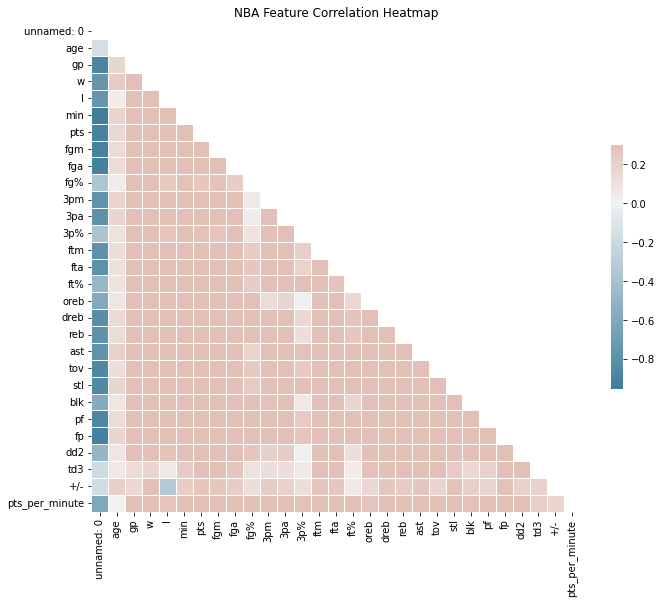

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Spark DataFrame to Pandas DataFrame
df = data.toPandas()

# 只保留数值列
df_numeric = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("NBA Feature Correlation Heatmap")
plt.show()


25/05/02 16:04:41 WARN Instrumentation: [8ff12b08] regParam is zero, which might cause numerical instability and overfitting.
25/05/02 16:04:41 WARN Instrumentation: [8ff12b08] Cholesky solver failed due to singular covariance matrix. Retrying with Quasi-Newton solver.


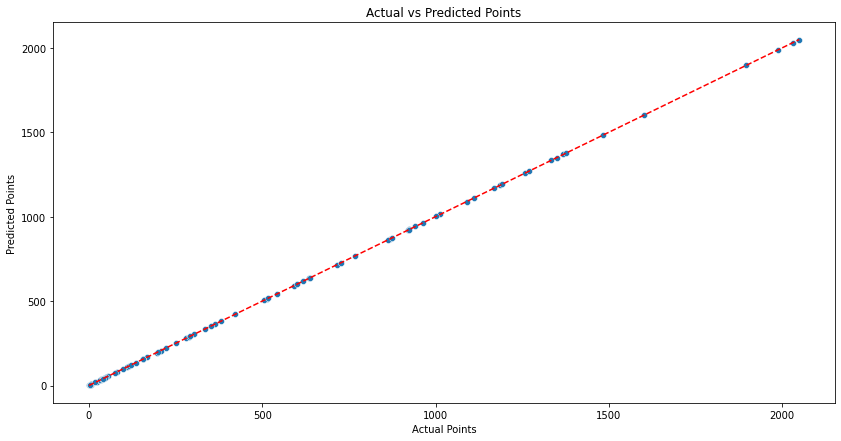

Mean Absolute Error (MAE): 0.17162833352386508
Mean Squared Error (MSE): 0.053256969191738196
R-squared: 0.9999998262824152
No data available for player: Nikola Jokic
Player not found in the dataset.


In [30]:
#NBA球员表现的预测模型
# 创建新特征（例如，每场比赛得分）。
# 删除 PName 列并对分类变量进行编码。
# 将数据分为训练集和测试集。
# 选择一个合适的回归模型（线性回归）。
# 在训练集上训练模型。
# 使用测试集进行预测。
# 计算评估指标（MAE、MSE 和 R-squared）。
# 定义一个函数 predict_points，用于预测特定球员的得分。
# 预测并输出特定球员（例如，Nikola Jokic）在下赛季的得分。
# Create new features
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
# Create new features
data = data.withColumn("ppg", data["pts"] / data["gp"])

# Index categorical columns
team_indexer = StringIndexer(inputCol="team", outputCol="team_index")
pos_indexer = StringIndexer(inputCol="pos", outputCol="pos_index")

# Assemble features into a feature vector
assembler = VectorAssembler(inputCols=[col for col in data.columns if col not in ['pts', 'pname', 'team', 'pos']], outputCol="features")

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="pts")

# Split the data into a training set and a test set
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Create a Pipeline
pipeline = Pipeline(stages=[team_indexer, pos_indexer, assembler, lr])

# Train the model
model = pipeline.fit(train_data)

# Make predictions using the test set
predictions = model.transform(test_data)

# Convert predictions to Pandas DataFrame for visualization
predictions_pd = predictions.select("pts", "prediction").toPandas()

# Plotting actual vs predicted points
plt.figure(figsize=(14, 7))
sns.scatterplot(x=predictions_pd["pts"], y=predictions_pd["prediction"])
sns.lineplot(x=predictions_pd["pts"], y=predictions_pd["pts"], color="red", linestyle="--")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="pts", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol="pts", predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
evaluator = RegressionEvaluator(labelCol="pts", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

def predict_points(player_name):
    # Get the player's data
    player_data = data.filter(data['pname'] == player_name)
    
    # Check if the player is in the dataset
    if player_data.count() == 0:
        print(f"No data available for player: {player_name}")
        return None
    
    # Transform the player's data
    player_prediction = model.transform(player_data)
    
    # Get the prediction
    points_prediction = player_prediction.select("prediction").collect()[0][0]
    
    return points_prediction

# Predict points for a specific player
player_name = "Nikola Jokic"  # replace with the name of the player
predicted_points = predict_points(player_name)

if predicted_points is not None:
    print(f"Player Name: {player_name}")
    print(f"Predicted Points for {player_name} in the next season: {predicted_points:.2f}")
else:
    print("Player not found in the dataset.")

In [31]:
import pandas as pd

# 使用 Pandas 读取 CSV 文件
team_stats = pd.read_csv("team_stats.csv")
pos_stats = pd.read_csv("pos_stats.csv")
age_stats = pd.read_csv("age_stats.csv")
team_top_scorers = pd.read_csv("team_top_scorers.csv")
pos_top_scorers = pd.read_csv("pos_top_scorers.csv")
age_top_scorers = pd.read_csv("age_top_scorers.csv")
top_10_scorers = pd.read_csv("top_10_scorers.csv")
player_avg_rebounds = pd.read_csv("player_avg_rebounds.csv")
player_avg_assists = pd.read_csv("player_avg_assists.csv")
player_pts_per_min = pd.read_csv("player_pts_per_min.csv")
player_fg_3p_stats = pd.read_csv("player_fg_3p_stats.csv")
team_win_lose_rate = pd.read_csv("team_win_lose_rate.csv")


/tmp/ipykernel_1428278/4148056131.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(team_stats['team_avg_points'], shade=True, label='Average Points')
/tmp/ipykernel_1428278/4148056131.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(team_stats['team_avg_rebounds'], shade=True, label='Average Rebounds')
/tmp/ipykernel_1428278/4148056131.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(team_stats['team_avg_assists'], shade=True, label='Average Assists')


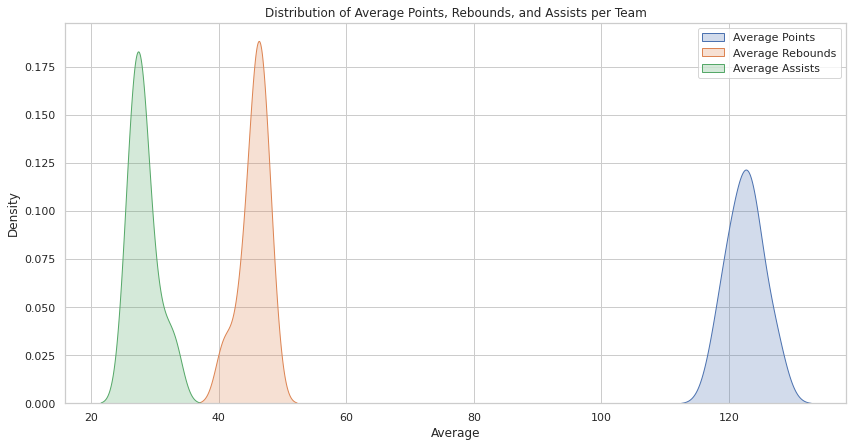

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 设置图形样式
sns.set(style="whitegrid")

# 1.每个球队的场均得分、篮板和助攻的横着的柱状图
# 确保数据是数值类型
team_stats['team_avg_points'] = pd.to_numeric(team_stats['team_avg_points'], errors='coerce')
team_stats['team_avg_rebounds'] = pd.to_numeric(team_stats['team_avg_rebounds'], errors='coerce')
team_stats['team_avg_assists'] = pd.to_numeric(team_stats['team_avg_assists'], errors='coerce')

# 每个球队的场均得分、篮板和助攻的高斯分布图
plt.figure(figsize=(14, 7))
sns.kdeplot(team_stats['team_avg_points'], shade=True, label='Average Points')
sns.kdeplot(team_stats['team_avg_rebounds'], shade=True, label='Average Rebounds')
sns.kdeplot(team_stats['team_avg_assists'], shade=True, label='Average Assists')
plt.title('Distribution of Average Points, Rebounds, and Assists per Team')
plt.xlabel('Average')
plt.ylabel('Density')
plt.legend()
plt.show()

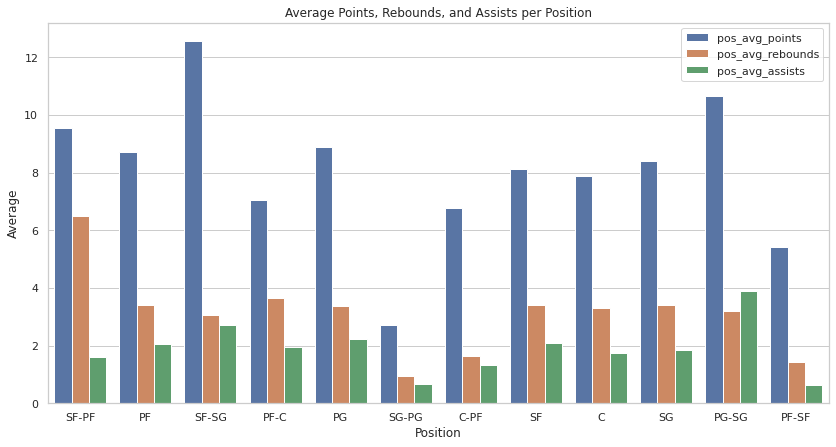

In [33]:
# 2.每个位置的场均得分、篮板和助攻的竖着的柱状图
plt.figure(figsize=(14, 7))
pos_stats_melted = pos_stats.melt(id_vars="pos", value_vars=["pos_avg_points", "pos_avg_rebounds", "pos_avg_assists"], var_name="Metric", value_name="Value")
sns.barplot(x='pos', y='Value', hue='Metric', data=pos_stats_melted)
plt.title('Average Points, Rebounds, and Assists per Position')
plt.xlabel('Position')
plt.ylabel('Average')
plt.legend()
plt.show()

In [34]:
import json
# 转换数据为 ECharts 格式
pos_stats_melted = pos_stats.melt(id_vars="pos", value_vars=["pos_avg_points", "pos_avg_rebounds", "pos_avg_assists"], var_name="Metric", value_name="Value")

# 准备数据
positions = pos_stats_melted['pos'].unique().tolist()
metrics = pos_stats_melted['Metric'].unique().tolist()

# 创建数据字典
data_dict = {metric: pos_stats_melted[pos_stats_melted['Metric'] == metric][['pos', 'Value']].set_index('pos').to_dict()['Value'] for metric in metrics}

# 生成 ECharts 数据
series_data = []
for metric in metrics:
    series_data.append({
        "name": metric,
        "type": "bar",
        "data": [data_dict[metric].get(pos, 0) for pos in positions]
    })

# 创建 ECharts 配置
echarts_config = {
    "title": {
        "text": 'Average Points, Rebounds, and Assists per Position'
    },
    "tooltip": {
        "trigger": 'axis',
        "axisPointer": {
            "type": 'shadow'
        }
    },
    "legend": {
        "data": metrics
    },
    "grid": {
        "left": '3%',
        "right": '4%',
        "bottom": '3%',
        "containLabel": True
    },
    "xAxis": {
        "type": 'category',
        "data": positions
    },
    "yAxis": {
        "type": 'value'
    },
    "series": series_data
}

# 将 ECharts 配置写入 HTML 文件
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <meta charset="utf-8">
    <title>ECharts</title>
    <script src="https://cdn.jsdelivr.net/npm/echarts@5.2.2/dist/echarts.min.js"></script>
</head>
<body>
    <div id="main" style="width: 100%; height: 600px;"></div>
    <script type="text/javascript">
        var chartDom = document.getElementById('main');
        var myChart = echarts.init(chartDom);
        var option = {json.dumps(echarts_config, indent=4)};
        myChart.setOption(option);
    </script>
</body>
</html>
"""

# 将 HTML 内容写入文件
with open("pos_stats_echarts.html", "w") as f:
    f.write(html_content)

print("ECharts 可视化已生成并保存为 pos_stats_echarts.html")

ECharts 可视化已生成并保存为 pos_stats_echarts.html


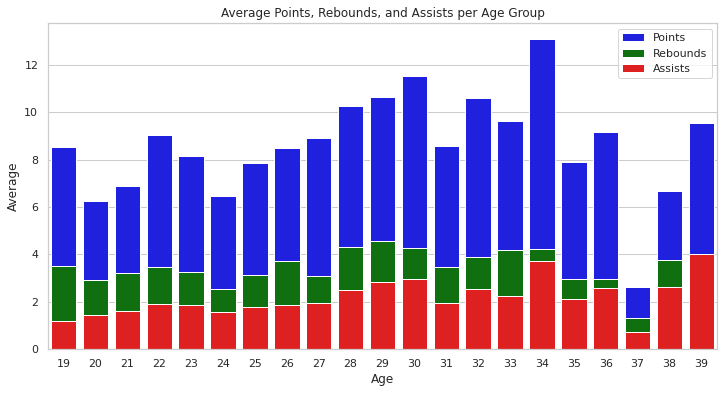

In [35]:
# 3. 每个年龄段的场均得分、篮板和助攻的条形图
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='age_avg_points', data=age_stats, color='blue', label='Points')
sns.barplot(x='age', y='age_avg_rebounds', data=age_stats, color='green', label='Rebounds')
sns.barplot(x='age', y='age_avg_assists', data=age_stats, color='red', label='Assists')
plt.title('Average Points, Rebounds, and Assists per Age Group')
plt.xlabel('Age')
plt.ylabel('Average')
plt.legend()
plt.show()

/tmp/ipykernel_1428278/2147596394.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='avg_points', data=team_top_scorers, palette=colors)


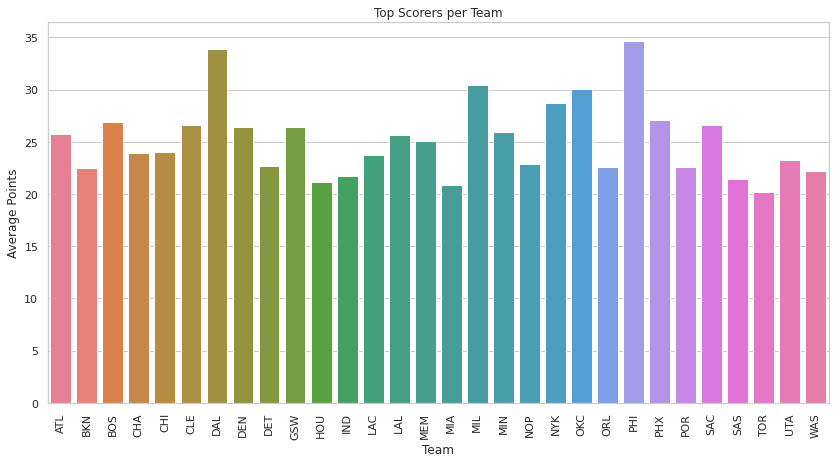

In [36]:
# 4. 每个球队得分最高的球员
# 每个球队场均得分最高的球员的竖着的柱状图
# 确保数据是数值类型
team_top_scorers['avg_points'] = pd.to_numeric(team_top_scorers['avg_points'], errors='coerce')

# 每个球队得分最高的球员的柱状图
plt.figure(figsize=(14, 7))
colors = sns.color_palette("husl", len(team_top_scorers))  # 使用不同的颜色
sns.barplot(x='team', y='avg_points', data=team_top_scorers, palette=colors)
plt.title('Top Scorers per Team')
plt.xlabel('Team')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_1428278/3559181190.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pos', y='avg_points', data=pos_top_scorers, palette=colors)


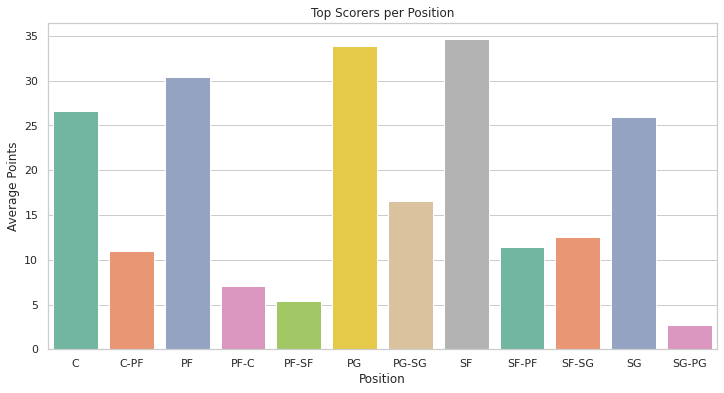

In [37]:
# 5. 每个位置得分最高的球员
# 确保数据是数值类型
pos_top_scorers['avg_points'] = pd.to_numeric(pos_top_scorers['avg_points'], errors='coerce')

# 每个位置得分最高的球员的柱状图
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set2", len(pos_top_scorers))  # 使用不同的颜色
sns.barplot(x='pos', y='avg_points', data=pos_top_scorers, palette=colors)
plt.title('Top Scorers per Position')
plt.xlabel('Position')
plt.ylabel('Average Points')
plt.show()

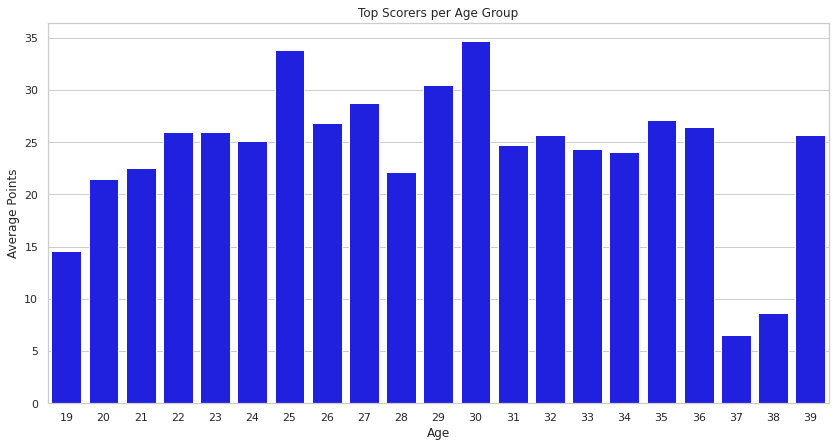

In [38]:
# 6. 每个年龄段得分最高的球员
# 每个年龄段场均得分最高的球员的竖着的柱状图
plt.figure(figsize=(14, 7))
sns.barplot(x='age', y='avg_points', data=age_top_scorers, color='blue')
plt.title('Top Scorers per Age Group')
plt.xlabel('Age')
plt.ylabel('Average Points')
plt.show()


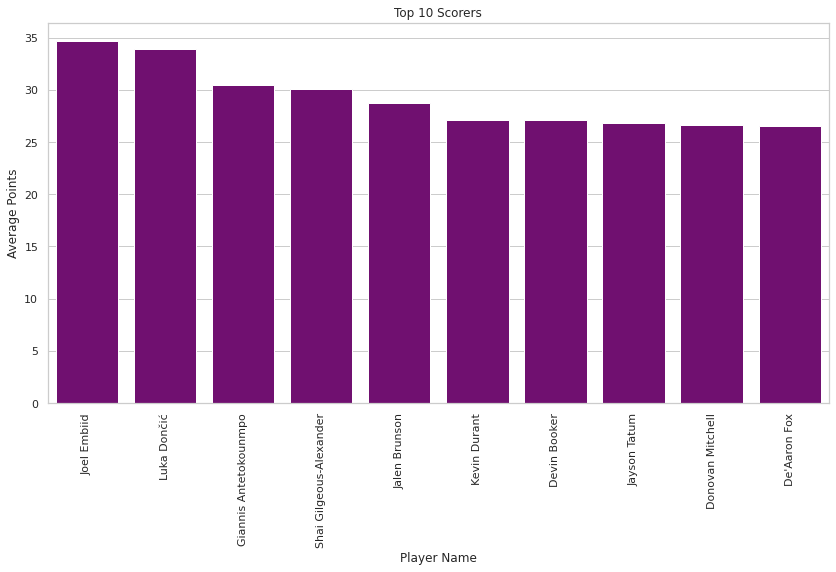

In [39]:
# 7. 场均得分最高的前 10 名球员
# 场均得分最高的前 10 名球员的高斯分布图
# 确保数据是数值类型
top_10_scorers['avg_points'] = pd.to_numeric(top_10_scorers['avg_points'][0:10], errors='coerce')

# 场均得分最高的前10名球员的柱状图
plt.figure(figsize=(14, 7))
sns.barplot(x='pname', y='avg_points', data=top_10_scorers[0:10], color='purple')
plt.title('Top 10 Scorers')
plt.xlabel('Player Name')
plt.ylabel('Average Points')
plt.xticks(rotation=90)
plt.show()

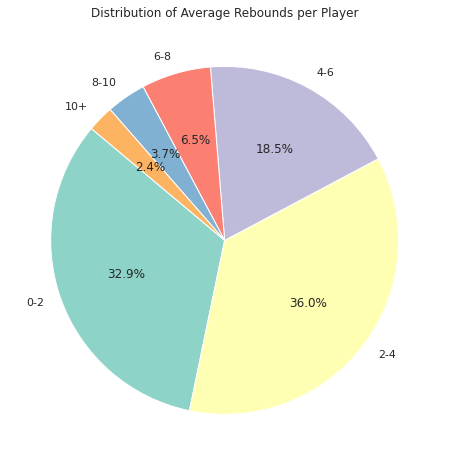

In [40]:
# 8. 每个球员的场均篮板数
# 确保数据是数值类型
player_avg_rebounds['avg_rebounds'] = pd.to_numeric(player_avg_rebounds['avg_rebounds'], errors='coerce')

# 统计场均篮板数在不同区间段的个数
bins_rebounds = [0, 2, 4, 6, 8, 10, float('inf')]
labels_rebounds = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
player_avg_rebounds['rebounds_range'] = pd.cut(player_avg_rebounds['avg_rebounds'], bins=bins_rebounds, labels=labels_rebounds, right=False)
rebounds_counts = player_avg_rebounds['rebounds_range'].value_counts().sort_index()

# 每个球员的场均篮板数的扇形图
plt.figure(figsize=(8, 8))
plt.pie(rebounds_counts, labels=rebounds_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))
plt.title('Distribution of Average Rebounds per Player')
plt.show()



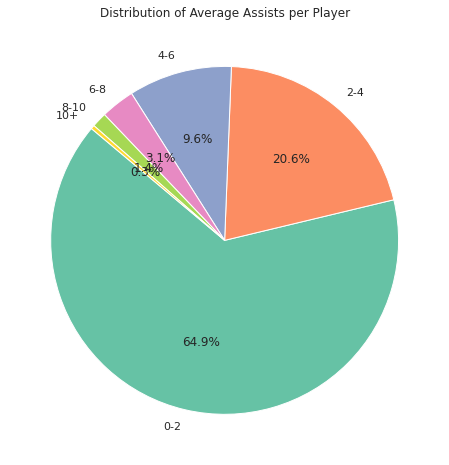

In [41]:
# 9. 每个球员的场均助攻数
# 确保数据是数值类型
player_avg_assists['avg_assists'] = pd.to_numeric(player_avg_assists['avg_assists'], errors='coerce')

# 统计场均助攻数在不同区间段的个数
bins_assists = [0, 2, 4, 6, 8, 10, float('inf')]
labels_assists = ['0-2', '2-4', '4-6', '6-8', '8-10', '10+']
player_avg_assists['assists_range'] = pd.cut(player_avg_assists['avg_assists'], bins=bins_assists, labels=labels_assists, right=False)
assists_counts = player_avg_assists['assists_range'].value_counts().sort_index()

# 每个球员的场均助攻数的扇形图
plt.figure(figsize=(8, 8))
plt.pie(assists_counts, labels=assists_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Average Assists per Player')
plt.show()

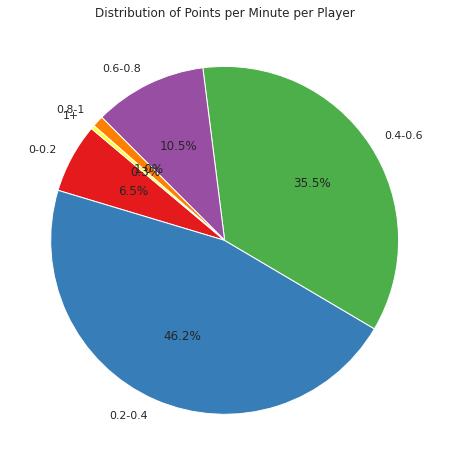

In [42]:
# 10. 每个球员的得分与时间的比率（得分/分钟）
# 确保数据是数值类型
player_pts_per_min['pts_per_minute'] = pd.to_numeric(player_pts_per_min['pts_per_minute'], errors='coerce')

# 统计得分与时间的比率在不同区间段的个数
bins_pts_per_min = [0, 0.2, 0.4, 0.6, 0.8, 1, float('inf')]
labels_pts_per_min = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1', '1+']
player_pts_per_min['pts_per_minute_range'] = pd.cut(player_pts_per_min['pts_per_minute'], bins=bins_pts_per_min, labels=labels_pts_per_min, right=False)
pts_per_minute_counts = player_pts_per_min['pts_per_minute_range'].value_counts().sort_index()

# 每个球员的得分与时间的比率（得分/分钟）的扇形图
plt.figure(figsize=(8, 8))
plt.pie(pts_per_minute_counts, labels=pts_per_minute_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set1"))
plt.title('Distribution of Points per Minute per Player')
plt.show()

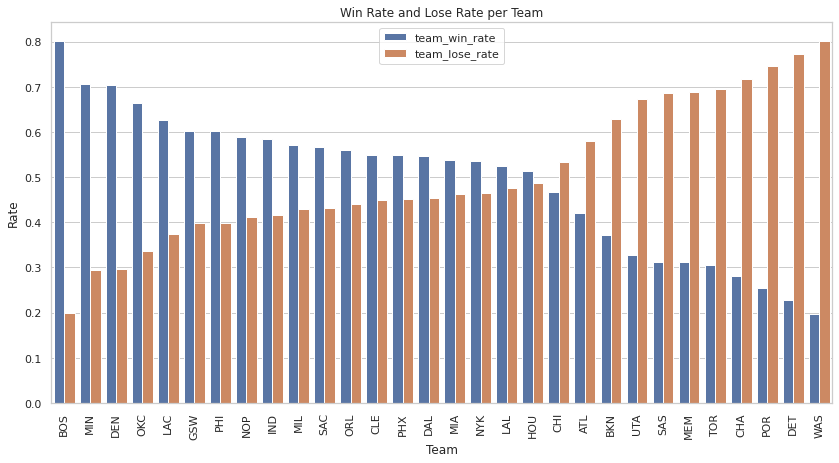

In [43]:
# 确保数据是数值类型
team_win_lose_rate['team_win_rate'] = pd.to_numeric(team_win_lose_rate['team_win_rate'], errors='coerce')
team_win_lose_rate['team_lose_rate'] = pd.to_numeric(team_win_lose_rate['team_lose_rate'], errors='coerce')

# 分析每个球队的胜率和输率的柱状图
plt.figure(figsize=(14, 7))
team_win_lose_rate_melted = team_win_lose_rate.melt(id_vars="team", value_vars=["team_win_rate", "team_lose_rate"], var_name="Metric", value_name="Value")
sns.barplot(x='team', y='Value', hue='Metric', data=team_win_lose_rate_melted)
plt.title('Win Rate and Lose Rate per Team')
plt.xlabel('Team')
plt.ylabel('Rate')
plt.legend()
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


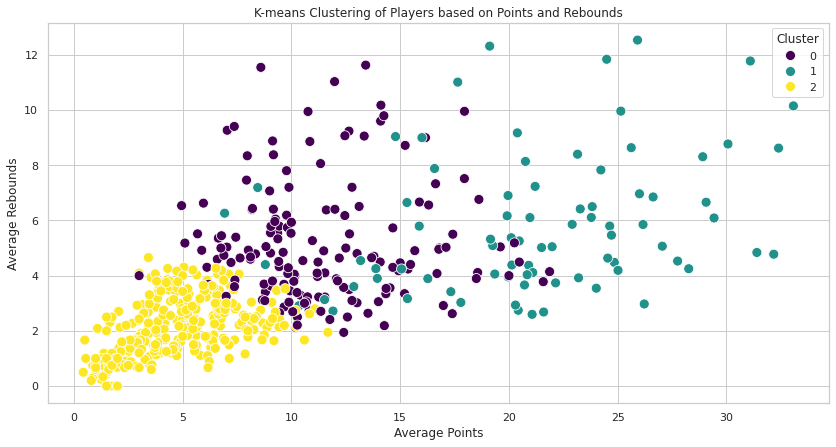

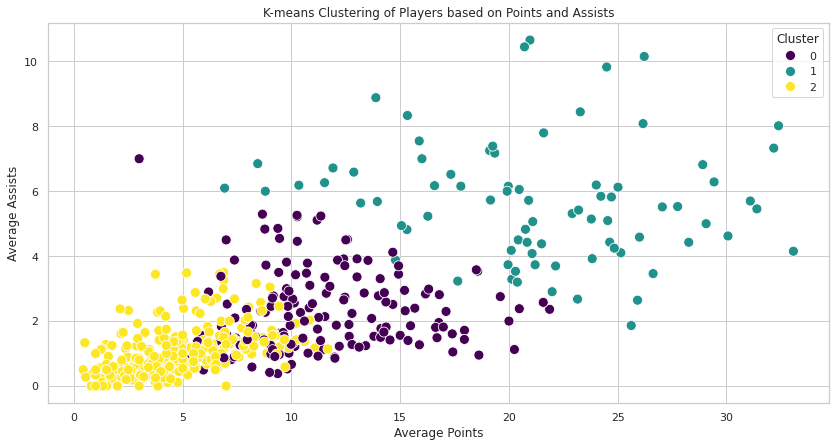

In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 读取处理后的数据
player_stats = pd.read_csv('../NBA_data_2024/processed_data.csv')

# 选择特征进行聚类
features = player_stats[['avg_points', 'avg_rebounds', 'avg_assists']]

# 数据标准化
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 使用 K-means 进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# 将聚类结果添加到数据集中
player_stats['cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(14, 7))
sns.scatterplot(x='avg_points', y='avg_rebounds', hue='cluster', palette='viridis', data=player_stats, s=100)
plt.title('K-means Clustering of Players based on Points and Rebounds')
plt.xlabel('Average Points')
plt.ylabel('Average Rebounds')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(14, 7))
sns.scatterplot(x='avg_points', y='avg_assists', hue='cluster', palette='viridis', data=player_stats, s=100)
plt.title('K-means Clustering of Players based on Points and Assists')
plt.xlabel('Average Points')
plt.ylabel('Average Assists')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


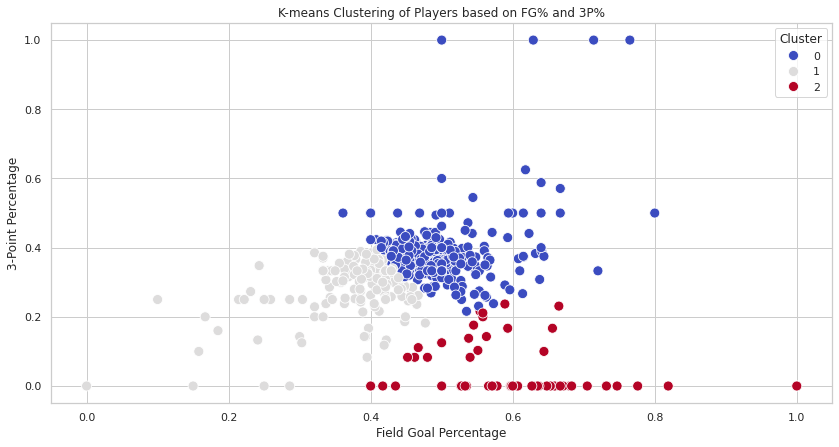

In [45]:
# 场均命中率和场均三分命中率的聚类和可视化
# 选择新的特征进行聚类
new_features = player_stats[['avg_fg%', 'avg_3p%']]

# 数据标准化
new_scaled_features = scaler.fit_transform(new_features)

# 使用 K-means 进行聚类
new_kmeans = KMeans(n_clusters=3, random_state=42)
new_clusters = new_kmeans.fit_predict(new_scaled_features)

# 将聚类结果添加到数据集中
player_stats['new_cluster'] = new_clusters

# 可视化新的聚类结果
plt.figure(figsize=(14, 7))
sns.scatterplot(x='avg_fg%', y='avg_3p%', hue='new_cluster', palette='coolwarm', data=player_stats, s=100)
plt.title('K-means Clustering of Players based on FG% and 3P%')
plt.xlabel('Field Goal Percentage')
plt.ylabel('3-Point Percentage')
plt.legend(title='Cluster')
plt.show()


In [46]:
import os
import subprocess

print("JAVA_HOME:", os.environ.get("JAVA_HOME"))
print("Testing java -version...")
subprocess.run(["java", "-version"])


JAVA_HOME: None
Testing java -version...


openjdk version "1.8.0_442"
OpenJDK Runtime Environment (build 1.8.0_442-8u442-b06~us1-0ubuntu1~22.04-b06)
OpenJDK 64-Bit Server VM (build 25.442-b06, mixed mode)


CompletedProcess(args=['java', '-version'], returncode=0)

In [47]:
spark.range(10).show()


+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



In [48]:
# 1. 初始化 Spark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

spark = SparkSession.builder \
    .appName("NBA MVP Regression Regularized") \
    .getOrCreate()

25/05/02 16:05:09 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [49]:
# 2. 加载数据并修复非法列名
df = spark.read.csv("0429_nba_players_2023_24_with_final_pos.csv", header=True, inferSchema=True)
df = df.withColumnRenamed('+/-', 'plus_minus')

In [50]:
# 3. 派生分析字段
df = df.withColumn("avg_points", col("PTS") / col("GP")) \
       .withColumn("avg_assists", col("AST") / col("GP")) \
       .withColumn("avg_rebounds", col("REB") / col("GP")) \
       .withColumn("pts_per_minute", col("PTS") / col("MIN")) \
       .withColumn("win_rate", col("W") / col("GP")) \
       .withColumn("avg_plus_minus", col("plus_minus") / col("GP"))

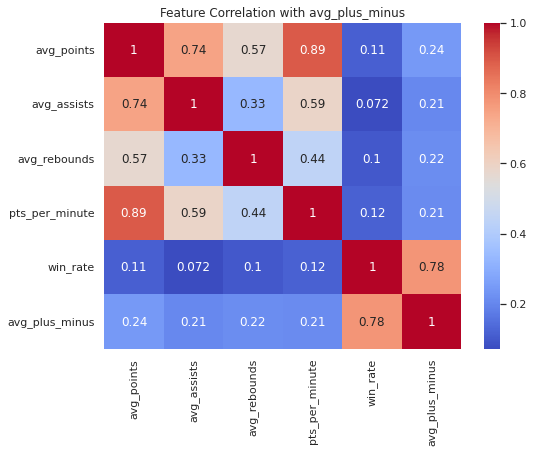

In [51]:
# 4. 数据过滤：过滤小样本球员
df_filtered = df.filter((col("GP") >= 20) & (col("MIN") > 200))

#  4.5 使用 pandas 生成相关性矩阵以辅助权重设定（热力图分析）
import pandas as pd
corr_pd = df_filtered.select(
    "avg_points", "avg_assists", "avg_rebounds", "pts_per_minute", "win_rate", "avg_plus_minus"
).toPandas()
corr_matrix = corr_pd.corr()

# 可视化热力图
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation with avg_plus_minus")
plt.show()

In [52]:
#  使用完整特征集（包含 avg_plus_minus）作为评分输入
features = ["avg_points", "avg_assists", "avg_rebounds", "pts_per_minute", "win_rate", "avg_plus_minus"]
assembler = VectorAssembler(inputCols=features, outputCol="features_vector")
df_vector = assembler.transform(df_filtered)

scaler = MinMaxScaler(inputCol="features_vector", outputCol="scaled_features")
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)

from pyspark.sql import functions as F
def extract_scaled(index):
    return F.udf(lambda x: float(x[index]), "double")

for i, feature in enumerate(features):
    df_scaled = df_scaled.withColumn(f"{feature}_scaled", extract_scaled(i)(col("scaled_features")))

In [53]:
#  加权评分模型（保留 avg_plus_minus，比例合理）
df_scored = df_scaled.withColumn("score",
    0.18 * col("avg_assists_scaled") +
    0.16 * col("avg_rebounds_scaled") +
    0.15 * col("pts_per_minute_scaled") +
    0.15 * col("avg_points_scaled") +
    0.11 * col("win_rate_scaled") +
    0.25 * col("avg_plus_minus_scaled")
)

In [57]:
# 反向训练正则化回归模型预测 score（防止过拟合）
features_for_model = features
assembler = VectorAssembler(inputCols=features_for_model, outputCol="features")
df_model = assembler.transform(df_scored).select("features", "score")

# 使用 LinearRegression 并启用 ElasticNet 正则化（无 RidgeRegression 类）
lr = LinearRegression(featuresCol="features", labelCol="score", elasticNetParam=0.3, regParam=0.1)
lr_model = lr.fit(df_model)

print("Regularization regression model coefficients:")
print(f"Intercept: {lr_model.intercept:.4f}")
for coef, name in zip(lr_model.coefficients, features_for_model):
    print(f"{name:<20}: {coef:.4f}")

print(f"\nR²: {lr_model.summary.r2:.4f}")
print(f"RMSE: {lr_model.summary.rootMeanSquaredError:.4f}")

Regularization regression model coefficients:
Intercept: 0.2101
avg_points          : 0.0036
avg_assists         : 0.0078
avg_rebounds        : 0.0050
pts_per_minute      : 0.1021
win_rate            : 0.0552
avg_plus_minus      : 0.0073

R²: 0.7957
RMSE: 0.0575


In [55]:
# 应用预测分数
df_pred = assembler.transform(df_scored)
df_pred = lr_model.transform(df_pred).withColumnRenamed("prediction", "regression_score")

/tmp/ipykernel_1428278/1250848022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="regression_score", y="PName", data=final_top_pd, palette="crest")


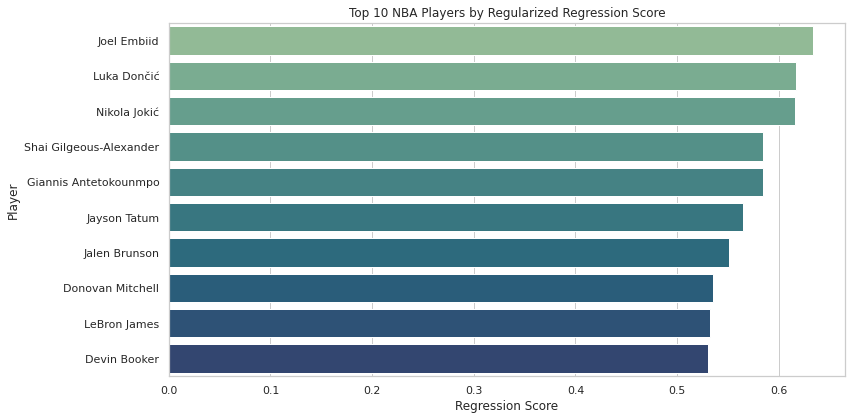

In [56]:
# 输出前10名
final_top = df_pred.select("PName", "Team", "regression_score") \
                    .orderBy(col("regression_score").desc()) \
                    .limit(10)
final_top_pd = final_top.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(x="regression_score", y="PName", data=final_top_pd, palette="crest")
plt.title("Top 10 NBA Players by Regularized Regression Score")
plt.xlabel("Regression Score")
plt.ylabel("Player")
plt.tight_layout()
plt.show()